In [5]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Beschreibende Statistik

## Übersicht

#### Lagemaß
#### Streuung
#### Graphiken
#### Mehrdimensionale Daten
#### <span style="color:blue">Abhängigkeit</span>
- <span style="color:blue">Korrelation</span> 相关
- Regression 回归

## Mehrdimensionale Daten - Zusammenhang?

#### Beispiele:
- zwei Würfel: sollten unabhängig sein
- Strom und Spannung: festes Verhältnis gemäß Ohmschen Gesetzes
- Luftdruck und Höhe über Meer: Barometrische Höhenformel

#### Frage: Hängt x und y zusammen?

In [7]:
'''reshape some of the data by sorting'''
np.random.seed(987654)              # initialize random generator to same
rain = np.random.random((2, 700))   # draw 2x700 equally distrib random numbers
xa = np.sort(rain[0])               # sort x with numpy
xb = xa[:]                          # make a copy of the object
ya = np.sort(rain[1])               # sort y with numpy
n = int(rain.shape[1]/2)            # half index
yb = np.append( ya[n:], ya[:n])     # reorder 1st and 2nd half by split&join

In [8]:
'''scatterplot for two dimensional data 
   together with their marginal distributions'''
def xywithmarginals(x, y, col):
    fig = plt.figure(figsize=(5, 5))                              # square canvas
    bins = np.linspace(0.0, 1.0, 21)                              # 20 bins from 0 to 1
    # define a 4x4 grid and distribute the virtual squares:
    axmx = plt.subplot2grid((4, 4), (0, 0), colspan=3)            # upper marginal 3x1, until 3rd col.
    axmy = plt.subplot2grid((4, 4), (1, 3), rowspan=3)            # right marginal 1x3, start 2nd/last
    axxy = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3) # main window, size 3x3, skip 1st row
    axmx.hist(x, color=col, bins=bins, label='x', alpha=.5)       # x-marginal histogram
    axmx.xaxis.set_ticklabels([])                                 # no tickmarks
    axmy.hist(y, color=col, bins=bins, label='y', alpha=.5,
            orientation='horizontal')                             # y-marginal, rotated
    axmy.yaxis.set_ticklabels([])
    axxy.scatter(x, y, color=col, edgecolor='')                   # let it rain in big xy-panel
    axxy.axis([x.min(), x.max(), y.min(), y.max()]);              # restrict area to full data range

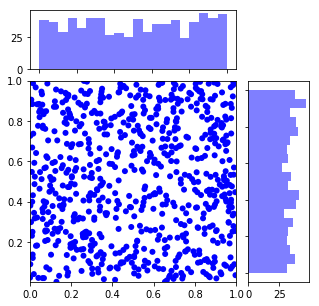

In [9]:
xywithmarginals(rain[0], rain[1], 'b')

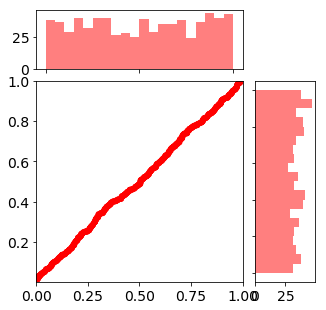

In [7]:
xywithmarginals(xa, ya, 'r')

# Zusammenhang - Korrelation
## Frage: 
Je größer x desto größer y?

## Gesucht
Maß, welches Gemeinsamkeit berücksichtigt

## Antwort
$$\sum_{i=1}^N x_i\cdot y_i$$

Daten zentrieren

## Kovarianz
Definition Kovarianz:
$$\mathrm{Cov}_{XY}=\frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})$$

> ist die Summe der quart.
ein Point hat kein Kovarianz. Es ist undefiniert.

### Eigenschaften

#### Symmetrie
$\mathrm{Cov}_{XY} = \mathrm{Cov}_{YX}\;$

#### Varianz: 
$\mathrm{Var}(X) = \mathrm{Cov}_{XX}$

In [11]:
'''covariance matrix'''
covariance = np.cov(rain[0], rain[1])                       # part of numpy
print('covariance matrix:\n{}\n'.format(covariance))        # four possible combinations
print('covariance_XY = {:.8f}'.format(covariance[0][1]))    # pick x-y off diagonal

covariance matrix:
[[0.0893181  0.00214176]
 [0.00214176 0.08634365]]

covariance_XY = 0.00214176


In [10]:
'''variance?'''
print('variance of x is {:.8f} and of y is {:.8f}'.format(rain[0].var(), rain[1].var()))

variance of x is 0.08919050 and of y is 0.08622030


In [9]:
'''variance with: delta degree of freedom = 1'''
print('variance of x is {:.8f} and of y is {:.8f}'.format(rain[0].var(ddof=1), rain[1].var(ddof=1)))

variance of x is 0.08931810 and of y is 0.08634365


In [17]:
np.cov?
np.var?

## Produkt-Moment-Korrelation nach Pearson:

### Vorgehen: Standardisieren 

#### 1. Zentrieren
$$x_i''=x_i-\bar{x} \qquad\qquad y_i''=y_i-\bar{y}$$

#### 2. Stauchen auf Standardabweichung
$$x_i'=\frac{x_i''}{\sigma_x} \qquad\qquad\qquad y_i'=\frac{y_i''}{\sigma_y}$$

### $\Rightarrow$ Neue Verteilungen $x'$ und $y'$
- Mittelwerte $\overline{x'}=0$ bzw.  $\overline{y'}=0$
- Standardabweichung $\sigma'_x=1$ bzw. $\sigma'_y=1$.

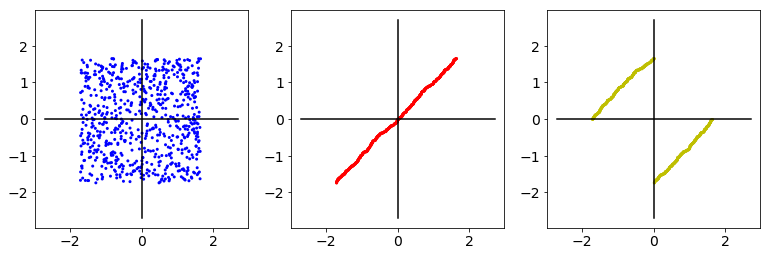

In [13]:
'''same data, different co-relation x_i to y_j'''
f = plt.figure(figsize=(13,4))
f.add_subplot(1,3,1)
x2 = rain[0]-rain[0].mean()
y2 = rain[1]-rain[1].mean()
x1 = x2/x2.std(ddof=1)             # standardized x/y
y1 = y2/y2.std(ddof=1)
plt.scatter(x1, y1, c='b', marker='.', edgecolor='')
plt.plot((0., 0.), (-2.7, 2.7), 'k-')
plt.plot((-2.7, 2.7), (0., 0.), 'k-');
f.add_subplot(1,3,2)
x2 = xa-xa.mean()
y2 = ya-ya.mean()
x1 = x2/x2.std(ddof=1)
y1 = y2/y2.std(ddof=1)
plt.scatter(x1, y1, c='r', marker='.', edgecolor='')
plt.plot((0., 0.), (-2.7, 2.7), 'k-')
plt.plot((-2.7, 2.7), (0., 0.), 'k-');
f.add_subplot(1,3,3)
x2 = xb-xb.mean()
y2 = yb-yb.mean()
x1 = x2/x2.std(ddof=1)
y1 = y2/y2.std(ddof=1)
plt.scatter(x1, y1, c='y', marker='.', edgecolor='')
plt.plot((0., 0.), (-2.7, 2.7), 'k-')
plt.plot((-2.7, 2.7), (0., 0.), 'k-');

In [44]:
x1 = rain[0]-rain[0].mean()/rain[0].std(ddof=1)              # standardized x
y1 = rain[1]-rain[1].mean()/rain[1].std(ddof=1)              # standardized y
print('covariance matrix is \n{}'.format(np.cov(x1, y1)))    # internal already ddof=1

covariance matrix is 
[[1.         0.02438857]
 [0.02438857 1.        ]]


### Zusammenhang
- Quadranten I und III
- Quadranten II und IV. 

... haben unterschiedliche Vorzeichen. Sinnvoll daher:

### Definition Korrelationskoeffizient nach Pearson
$$r_{XY} = \frac{1}{N-1}\sum_{i=1}^N x_i'\cdot y_i'$$

In [48]:
'''calculate Pearson correlation coefficient of data [x[N], y[N]]'''
def pearsonrxy(xy):
    return ((xy[0]-xy[0].mean())*(xy[1]-xy[1].mean())).sum() / (xy.shape[1]-1) / (xy[0].std(ddof=1) * xy[1].std(ddof=1))

print('Pearson correlation coefficient of rain is {:.6f}'.format(pearsonrxy(rain)))

Pearson correlation coefficient of rain is 0.024389


### Eigenschaften
- $-1\leq r_{XY}\leq +1$
- $y=x \quad\;\; \Rightarrow \quad r_{XY}=+1$
- $y=-x \quad \Rightarrow \quad r_{XY}=-1$

### Korrelation
In ursprünglichen Koordinaten

Korrelationskoeffizient
$$r_{XY}=\frac{\mathrm{Cov}_{XY}}{\sigma_X \sigma_Y}$$
mit der ***Kovarianz***
$$\mathrm{Cov}_{XY}=\frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})(y_i-\overline{y})$$

In [14]:
'''Correlation coefficient Pearson r 
   input: two data arrays to be correlated: a and b of type ndarray
   output: r_ab with ddof=1                                           '''
def ccpearson( a, b ):
    cc = np.corrcoef(a, b)[0][1]     # side element of correlation matrix
    return cc                    

print('Covariance rain:')
print('(original)          = {: .6f}'.format(ccpearson(rain[0], rain[1])))
print('(sorted lin)        = {: .6f}'.format(ccpearson(xa, ya)))
print('(sorted with offset)= {: .6f}'.format(ccpearson(xb, yb)))

Covariance rain:
(original)          =  0.024389
(sorted lin)        =  0.999489
(sorted with offset)= -0.521914


## Ergebnis Korrelation nach Pearson

$$r_{XY}=\frac{\mathrm{Cov}_{XY}}{\sigma_X \sigma_Y}$$
mit der ***Kovarianz***
$$\mathrm{Cov}_{XY}=\frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})(y_i-\overline{y})$$

- Bei exakter Übereinstimmung: $y=x$ ist $r=1$.
- Bei umgekehrtem Vorzeichen aber übereinstimmendem Betrag $y=-x$ wird $r=-1$.
- Bei grober Entsprechung liegt $r$ zwischen 0 und 1.
- Sind x und y unkorreliert, geht $r$ gegen $0$.

### Bedeutung der Korrelation nach Pearson
- $r=+1$ für Gleichheit $y=a\cdot x$
- $r>0$ für mittleren linearen Zusammenhang $y\sim x$
- $r<0$ für mittleren linearen Zusammenhang $y\sim -x$
- $r=-1$ für Antikorrelation  $y=-a\cdot x$
- $r=0$ wenn *kein* (linearer) Zusammenhang

#### Stärke (willkürlich) nach Betrag
- bis 0,2 => sehr geringe Korrelation
- bis 0,5 => geringe Korrelation
- bis 0,7 => mittlere Korrelation
- bis 0,9 => hohe Korrelation
- über 0,9 => sehr hohe Korrelation

#### Obacht
Korrelationskoeffizient trifft nur Aussage über **linearen** Zusammenhang.

> Korrelation ist nur fuer linearen Zusammenhang.

## Zusammenhang nicht-linear?

Covariance (/\)= -0.040828


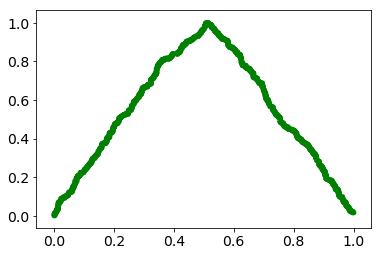

In [15]:
'''example for dependency - but no correlation'''
yc = np.append( np.sort(rain[1][:n]), np.sort(rain[1][n:])[::-1] )   # re-sort
plt.scatter(xa, yc, c='g', marker='o', edgecolor='')
print('Covariance (/\)= {:.6f}'.format( ccpearson(xa, yc) ))         # fct defined above

### Stückweise Korrelation
- Abschnitte
    - jede Abhängigkeit kann stückweise als linear angesehen werden
- Linearisieren
    - Aus Theorie eine Modellfunktion bilden
    - Abbilden der Daten

### Ausblick Regression

### Verhalten unter linearer Transformation
Unter der linearen Transformation
$$ \begin{array}{ccr}
 x'  & = a \cdot x & + \;b \\
 y'  & = c \cdot y & + \;d
\end{array} $$
bleibt betragsmäßig
$$r_{x'y'} = r_{xy} = \frac{\mathrm{Cov}(x,y)}{\sigma_x \sigma_y} = \frac{\mathrm{Cov}(x',y')}{\sigma_{x'} \sigma_{y'}}$$
das Vorzeichen ändert sich bei unterschiedlichen Vorzeichen von $a$ und $c$.

## Korrelation und Kausalität

#### Keine Aussage über die Ursache
- $y(x)$?
- $x(y)$?
- $x(z) \;$ und $\; y(z)$?
- Zufall?

#### Beispiele
- Schein-Korrelation durch Versteckte Variable
    - Schulkinder: Geschicklichkeit korreliert mit Körpergröße
        - Grund: versteckte Variable "Alter"
- Inhomogenitäts-Korrelation
    - Schuhgröße vs. Einkommen: Männer, Frauen
- Schein-Korrelation durch Ausreisser / Standardisierung
    - zufällige Variation innerhalb Streuung
- oft bei Zeitreihen

# Fragen?